## Bhargav Srinivasa Desikan - Topic Modelling (and more) with NLP framework Gensim

https://www.youtube.com/watch?v=ZkAFJwi-G98&index=8&list=PLGVZCDnMOq0rjkF7p_F4qtaVJQnjK1oKT

In [ ]:
#! pip install gensim
#! pip install pyLDAVis

In [1]:

import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [2]:
# since we're working in python 2.7 in this tutorial, we need to make sure to clean our data to make it unicode consistent
# def clean(text):
#     return ''.join([i if ord(i) < 128 else ' ' for i in text])

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

## Preprocessing data

In [3]:
nlp = spacy.load('en')  # crete a language pipeline

In [4]:

#  add stopwords to make better model
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [5]:
%%time
doc = nlp(text)

CPU times: user 28.1 s, sys: 18 s, total: 46.1 s
Wall time: 34.6 s


In [ ]:
doc  # each word in doc it assings 

## construc ta corpus
- list of list
-  every word is separated

In [6]:
# we add some words to the stop word list
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [ ]:
texts[:1]

## Bigrams
- what are they



In [7]:
bigram = gensim.models.Phrases(texts)

In [8]:
texts = [bigram[line] for line in texts]

In [ ]:
texts[10]

## Bag of words
-  count each word in doc
- map every single word to an id, and making a bag of words out of it

In [9]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [10]:
corpus[100]

[(62, 3),
 (102, 2),
 (117, 2),
 (195, 1),
 (273, 1),
 (288, 1),
 (290, 1),
 (431, 1),
 (519, 1),
 (552, 1),
 (558, 1),
 (643, 1),
 (755, 1),
 (907, 1),
 (1035, 2),
 (1222, 1),
 (1243, 1),
 (1399, 1),
 (1433, 2),
 (1638, 1),
 (1646, 1),
 (1679, 1),
 (1680, 1),
 (1772, 3),
 (1967, 1),
 (2000, 2),
 (2053, 1),
 (2071, 1),
 (2079, 1),
 (2090, 1),
 (2745, 2),
 (2746, 1),
 (2841, 3),
 (2954, 1),
 (3108, 1),
 (3109, 1),
 (3110, 1),
 (3111, 1),
 (3112, 1),
 (3113, 1),
 (3114, 1),
 (3115, 1),
 (3116, 1),
 (3117, 1),
 (3118, 1),
 (3119, 1),
 (3120, 1),
 (3121, 1),
 (3122, 1),
 (3123, 1),
 (3124, 1),
 (3125, 1),
 (3126, 1),
 (3127, 1),
 (3128, 1),
 (3129, 1),
 (3130, 1),
 (3131, 1)]

# LSI

LSI stands for Latent Semantic Indeixing - it is a popular information retreival method which works by decomposing the original matrix of words to maintain key topics. Gensim's implementation uses an SVD.

In [11]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary) # top 10  is better than top 20 or 30 

In [12]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.513*"the" + 0.364*"-PRON-" + 0.132*"force" + 0.124*"israeli" + 0.117*"palestinian" + 0.113*"people" + 0.112*"australian" + 0.111*"arafat" + 0.110*"us" + 0.110*"government"'),
 (1,
  '-0.365*"palestinian" + -0.352*"israeli" + -0.338*"arafat" + 0.222*"-PRON-" + -0.180*"israel" + -0.156*"official" + -0.156*"sharon" + -0.152*"hamas" + -0.142*"west_bank" + -0.128*"kill"'),
 (2,
  '0.310*"the" + -0.247*"afghanistan" + -0.227*"us" + -0.227*"force" + -0.200*"-PRON-" + -0.197*"al_qaeda" + -0.185*"bin_laden" + 0.172*"fire" + -0.150*"pakistan" + -0.133*"tora_bora"'),
 (3,
  '-0.470*"-PRON-" + 0.253*"the" + -0.203*"win" + 0.189*"force" + -0.155*"good" + 0.155*"afghanistan" + 0.155*"fire" + -0.140*"test" + 0.134*"area" + -0.125*"metre"'),
 (4,
  '0.331*"fire" + -0.316*"the" + 0.261*"area" + 0.210*"sydney" + -0.159*"company" + 0.158*"firefighter" + 0.156*"south" + -0.149*"australian" + 0.142*"wind" + 0.140*"wales"')]

# HDP

HDP, the Hierarchical Dirichlet process is an unsupervised topic model which figures out the number of topics on it's own.



In [13]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [14]:
hdpmodel.show_topics()

[(0,
  '0.006*the + 0.005*israeli + 0.004*arafat + 0.003*us + 0.003*palestinian + 0.003*sharon + 0.003*official + 0.003*india + 0.002*taliban + 0.002*west_bank + 0.002*-PRON- + 0.002*force + 0.002*powell + 0.002*government + 0.002*afghanistan + 0.002*military + 0.002*militant + 0.002*hamas + 0.002*report + 0.002*source'),
 (1,
  '0.003*the + 0.003*match + 0.002*israeli + 0.002*-PRON- + 0.002*ask + 0.002*late + 0.002*final + 0.002*team + 0.002*rafter + 0.002*play + 0.002*france + 0.002*day + 0.002*guarantee + 0.002*europe + 0.001*australia + 0.001*world + 0.001*hiv + 0.001*tennis + 0.001*double + 0.001*attack'),
 (2,
  '0.004*the + 0.004*group + 0.003*palestinian + 0.002*government + 0.002*israeli + 0.002*arafat + 0.002*hamas + 0.002*kill + 0.002*israel + 0.002*attack + 0.002*sharon + 0.002*choose + 0.002*security + 0.002*militant + 0.002*suicide_attack + 0.002*call + 0.002*human_right + 0.002*-PRON- + 0.001*chief + 0.001*gaza_strip'),
 (3,
  '0.005*-PRON- + 0.003*airport + 0.002*taliba

# LDA
LDA, or Latent Dirichlet Allocation is arguably the most famous topic modelling algorithm out there. Out here we create a simple topic model with 10 topics.

In [15]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [16]:
ldamodel.show_topics()

[(0,
  '0.009*"the" + 0.008*"fire" + 0.005*"-PRON-" + 0.005*"union" + 0.004*"day" + 0.003*"year" + 0.003*"give" + 0.003*"in" + 0.003*"australian" + 0.003*"force"'),
 (1,
  '0.016*"the" + 0.012*"-PRON-" + 0.006*"palestinian" + 0.005*"israeli" + 0.004*"area" + 0.004*"australian" + 0.004*"force" + 0.003*"official" + 0.003*"kill" + 0.003*"tell"'),
 (2,
  '0.017*"the" + 0.009*"-PRON-" + 0.007*"australian" + 0.006*"company" + 0.005*"man" + 0.005*"australia" + 0.004*"a" + 0.004*"force" + 0.003*"people" + 0.003*"qantas"'),
 (3,
  '0.023*"the" + 0.011*"-PRON-" + 0.008*"australia" + 0.007*"people" + 0.005*"government" + 0.004*"australian" + 0.004*"day" + 0.004*"report" + 0.004*"force" + 0.003*"year"'),
 (4,
  '0.020*"the" + 0.009*"-PRON-" + 0.005*"people" + 0.005*"year" + 0.005*"day" + 0.004*"australian" + 0.004*"police" + 0.004*"force" + 0.004*"australia" + 0.003*"new"'),
 (5,
  '0.014*"the" + 0.012*"-PRON-" + 0.005*"government" + 0.004*"australian" + 0.004*"year" + 0.003*"australia" + 0.003*"d

## pyLDavis


In [17]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.024424  0.034744       1        1  20.943085
3     -0.012514 -0.002639       2        1  14.842359
4     -0.014642  0.020657       3        1  13.270414
7      0.004152  0.015373       4        1  10.773110
6      0.046999  0.019004       5        1   9.806475
2     -0.028829  0.008051       6        1   7.779535
9     -0.036584 -0.020498       7        1   7.678795
0     -0.001127 -0.065370       8        1   6.099954
8      0.048568 -0.008581       9        1   4.877386
5      0.018401 -0.000741      10        1   3.928895, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
209   Default  337.000000      -PRON-  337.000000  30.0000  30.0000
41    Default   68.000000        fire   68.000000  29.0000  29.0000
102   Default  498.000000         the  498.000000  28.0000  28.0000
160   Default   41.000000    pakistan   41.000000  27.0000  27.0000
140   Default   31.000000       india   31.000000  26.0000  26.0000
234   Default  107.000000  government  107.000000  25.0000  25.0000
326   Default  113.000000   australia  113.000000  24.0000  24.0000
883   Default  123.000000  australian  123.000000  23.0000  23.0000
2319  Default   60.000000     company   60.000000  22.0000  22.0000
1037  Default   67.000000         man   67.000000  21.0000  21.0000
489   Default   40.000000         win   40.000000  20.0000  20.0000
802   Default   49.000000       union   49.000000  19.0000  19.0000
2354  Default   31.000000      qantas   31.000000  18.0000  18.0000
16    Default   54.000000        call   54.000000  17.0000  17.0000
117   Default  101.000000        year  101.000000  16.0000  16.0000
44    Default  101.000000       force  101.000000  15.0000  15.0000
907   Default   71.000000      report   71.000000  14.0000  14.0000
222   Default   99.000000         day   99.000000  13.0000  13.0000
1022  Default   29.000000       issue   29.000000  12.0000  12.0000
947   Default   43.000000        cent   43.000000  11.0000  11.0000
2654  Default    8.000000    zimbabwe    8.000000  10.0000  10.0000
415   Default   63.000000        good   63.000000   9.0000   9.0000
899   Default   28.000000       metre   28.000000   8.0000   8.0000
105   Default   63.000000       today   63.000000   7.0000   7.0000
2348  Default   27.000000  commission   27.000000   6.0000   6.0000
141   Default   24.000000      indian   24.000000   5.0000   5.0000
1605  Default   33.000000         pay   33.000000   4.0000   4.0000
372   Default   31.000000           $   31.000000   3.0000   3.0000
2173  Default   59.000000      arafat   59.000000   2.0000   2.0000
483   Default   82.000000          us   82.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
234   Topic10    5.600764  government  107.015640   0.2867  -5.3729
416   Topic10    2.425326       great   25.241463   0.8943  -6.2098
947   Topic10    3.193241        cent   43.739552   0.6196  -5.9348
883   Topic10    5.185543  australian  123.817261   0.0639  -5.4499
117   Topic10    4.640889        year  101.699486   0.1497  -5.5609
105   Topic10    3.403164       today   63.849678   0.3050  -5.8711
1037  Topic10    3.273124         man   67.275749   0.2138  -5.9100
15    Topic10    2.956730         but   52.730991   0.3557  -6.0117
326   Topic10    3.746687   australia  113.327332  -0.1726  -5.7749
440   Topic10    1.924130    position   18.762201   0.9594  -6.4413
222   Topic10    3.442781         day   99.724007  -0.1293  -5.8595
228   Topic10    2.473387         end   45.565689   0.3232  -6.1902
907   Topic10    2.806108      report   71.737427  -0.0044  -6.0640
483   Topic10    2.898101          us   82.103500  -0.1071  -6.0317
330   Topic10    2.482030       claim   50.861065   0.2168  -6.1867
671   Topic10    1.894518         cut   22.92


# Round-up
Okay - so what have we learned so far? By using spaCy, we cleaned up our data super fast. It's worth noting that by running our doc through the pipeline we also know about every single words POS-tag and NER-tag. This is useful information and we can do some funky things with it! I would highly recommend going through this repository to see examples of hands-on spaCy usage.

As for gensim and topic modelling, it's pretty easy to see how well we could create our topic models. Now the obvious next question is - how do we use these topic models? The news classification notebook in the Gensim notebooks directory is a good example of how we can use topic models in a practical scenario.

We will continue this tutorial by demonstrating a newer topic modelling features of gensim - in particular, Topic Coherence.

Topic Coherence
Topic Coherence is a new gensim functionality where we can identify which topic model is 'better'. By returning a score, we can compare between different topic models of the same. We use the same example from the news classification notebook to plot a graph between the topic models we have created

In [18]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [19]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [20]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

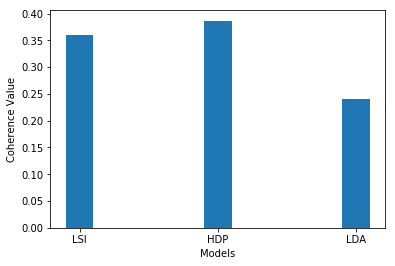

In [21]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])


We can see that topic coherence helped us get past manually inspecting our topic models - we can now keep fine tuning our models and compare between them to see which has the best performance.

This also brings us to the end of the runnable part of this tutorial - we will continue however by briefly going over two more Jupyter notebooks I have previously worked on - mainly, Dynamic Topic Modelling and Document Word Coloring.